# Context | Fully Connected Neural Network (FCNN)

The problem consists on identifing the sign language gestures for the digits from 1 to 10.

[Arda Mavi](https://github.com/ardamavi/Sign-Language-Digits-Dataset) has compiled a dataset consisting of 2062 images with the correspoding labels.

## Load datasets

The dataset had to be "fixed" since the labels did no match the images correctly.

More can be found in this, sometimes, [comic discussion](https://www.kaggle.com/datasets/ardamavi/sign-language-digits-dataset/discussion/57074); where the author at some point writes:

> "I said that again, again and again. Please read my comments before."

The label [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.] which corresponds to the digit 3.


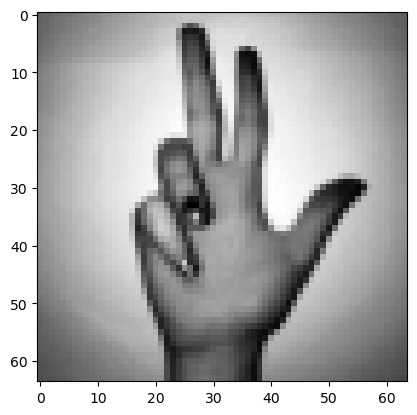

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

images = np.load("dataset/X.npy")  # images
labels = np.load("dataset/Y.npy")  # labels

# Split the dataset into training and testing sets 
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size = 0.2, random_state = 42)

# Example of an image that match the label
print(f"The label {labels[800]} which corresponds to the digit 3.")
plt.imshow(images[800], cmap="gray")

## Inspect the data
There are 2062 images 64 x 64 pixels. And there are an array of labels with 10 classes - digits from 1 to 10. 

We are spliting the dataset into two sets: 
* train_images: 1649 images
* test_images: 413 images

And finally, tha values of the pixels are already between [0, 1].

In [6]:
# Print the shapes to verify
print("Train images shape:", train_images.shape) # (1649, 64, 64)
print("Train labels shape:", train_labels.shape) # (1649, 10)
print("Test images shape:", test_images.shape) # (413, 64, 64)
print("Test labels shape:", test_labels.shape) # (413, 10)

# Reshape to make the images into 1D vector for each example
train_images = train_images.reshape((1649, 64 * 64))
test_images = test_images.reshape((413, 64 * 64))

# Finally, the values are already standarized [0-1] and in a categorical form.

Train images shape: (1649, 64, 64)
Train labels shape: (1649, 10)
Test images shape: (413, 64, 64)
Test labels shape: (413, 10)


### Model structure (FeedForward Neural Network - FFNN)

In [10]:
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential()

#One hidden layer with 128 neurons (RelU)
network.add(layers.Dense(128, activation='relu', input_shape=(64 * 64,)))

#One hidden layer with 128 neurons (RelU)
network.add(layers.Dense(128, activation='relu'))

# Output layer with 10 neurons
network.add(layers.Dense(10, activation = 'softmax'))

network.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 542,218 (2.07 MB)

 Trainable params: 542,218 (2.07 MB)

 Non-trainable params: 0 (0.00 B)

## Train the model

In [12]:
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# Train the model
history = network.fit(train_images, train_labels, epochs = 50, batch_size = 128, validation_data = (test_images, test_labels) )

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.1039 - loss: 2.9361 - val_accuracy: 0.1138 - val_loss: 2.4599
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1153 - loss: 2.3808 - val_accuracy: 0.1961 - val_loss: 2.3037
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1744 - loss: 2.2687 - val_accuracy: 0.1719 - val_loss: 2.2311
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2227 - loss: 2.1927 - val_accuracy: 0.2058 - val_loss: 2.1607
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2241 - loss: 2.1347 - val_accuracy: 0.2881 - val_loss: 2.0910
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3079 - loss: 2.0621 - val_accuracy: 0.2833 - val_loss: 2.0219
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3168 - loss: 1.9826 - val_accuracy: 0.3656 - val_loss: 1.9440
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3282 - loss: 1.9503 - val_accuracy: 0.4044 - val_loss

## Traning vs. Test Accuracy

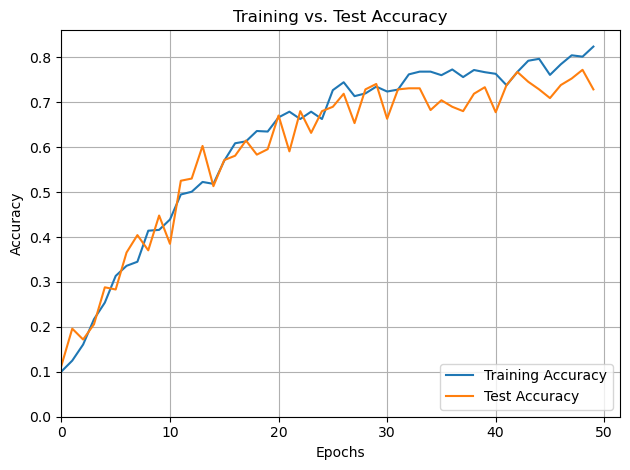

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Place the legend in the bottom-right corner
plt.legend(loc='lower right')

# Set the x-axis ticks to be multiples of 4
plt.xticks(range(0, len(history.history['accuracy']) + 1, 10))

# Set the limits to ensure the zero is at the bottom-left corner
plt.xlim(left=0)
plt.ylim(bottom=0)

# Add a grid
plt.grid(True)

# Add a title
plt.title('Training vs. Test Accuracy')

# Remove space between plot and axis
plt.tight_layout()

# Show the plot
plt.show()


## Evaluate the accuracy of the model

In [18]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

#Compare the test and train loss and accuracy 
print(f"Loss: {round(test_loss, 2)} | Accuracy: {round(test_acc * 100, 1)}%")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7390 - loss: 0.8485 
Loss: 0.86 | Accuracy: 72.9%
